`Done - cdp_target`
Operations:
- aggregating to firm year by taking the mean and the count of relevant columns
- dropping text columns or coulumns that would be hard to aggregate
- taking the log1p of numerical columns
- dropping some rows where values did not make sense because they were negative

altenratives:
- instead of dropping the rows where values did not make sense I could set them to NA and mark them with the missing column
- I could take the median of some variables


final result:
- firm year analysis with summary statistics of initatives

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_71368/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_stata("../../data/CDP Cleaning/cleaned outputs/cdp_target.dta")

In [3]:
data.shape

(45014, 18)

In [4]:
data.sample(5)

,id,cdp_target_reference,cdp_targetscope,cdp_targetscope_percent,cdp_targetamount,cdp_baseyear,cdp_baseyearemission,cdp_targetyear,cdp_sbt,cdp_targetdetail,cdp_timeprogress,cdp_targetprogress,year,cdp_startyear,cdp_targetstatus,cdp_targetduration,cdp_targettype,cdp_targetintensityunit
35971,31484,Int 3,Scope 1 +2 (market-based),100.0,16.0,2016.0,3.200,2025.0,"Yes, we consider this a science-based target,...",This goal is to achieve direct and indirect en...,11.111111,100.000000,2018.0,2016.0,Underway,9.0,intensity,Metric tons CO2e per metric ton of aluminum*
35032,4392,Int1,Scope 1+2 (location-based),100.0,11.7,2007.0,0.004,2020.0,"No, but we anticipate setting one in the next ...",,69.000000,45.000000,2017.0,NaN,,NaN,intensity,Other: lbs CO2e per Gallon of Product
15483,20945,Abs 1,Scope 1+2 (market-based),100.0,20.0,2013.0,103411.000,2020.0,"Yes, we consider this a science-based target, ...","In May 2018, we have set a GHG emissions reduc...",50.000000,119.141097,2020.0,2018.0,Achieved,2.0,absolute,
35026,3672,Int1,Scope 1+2 (location-based),100.0,10.0,2013.0,110.900,2018.0,"No, and we do not anticipate setting one in th...",1 of 2 parts - Boutiques and Offices Five-year...,20.000000,0.000000,2017.0,NaN,,NaN,intensity,Metric tonnes CO2e per square meter*
39669,6161,Int 1,Scope 1+2 (market-based),99.1,10.0,2013.0,0.131,2020.0,"No, but we anticipate setting one in the next ...","For UNIQLO stores in Japan, we are promoting a...",85.714286,312.977099,2020.0,2013.0,Achieved,7.0,intensity,Metric tons CO2e per square meter


In [5]:
data.columns

Index(['id', 'cdp_target_reference', 'cdp_targetscope',
       'cdp_targetscope_percent', 'cdp_targetamount', 'cdp_baseyear',
       'cdp_baseyearemission', 'cdp_targetyear', 'cdp_sbt', 'cdp_targetdetail',
       'cdp_timeprogress', 'cdp_targetprogress', 'year', 'cdp_startyear',
       'cdp_targetstatus', 'cdp_targetduration', 'cdp_targettype',
       'cdp_targetintensityunit'],
      dtype='object')

In [6]:
# dropping text columns
data.drop(columns=['cdp_targetdetail', 'cdp_targetintensityunit'], inplace=True)

<Axes: xlabel='cdp_timeprogress', ylabel='Count'>

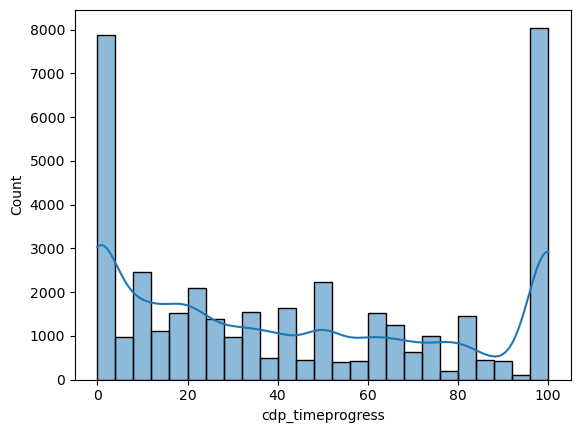

In [42]:
# plot distribution of timeprogress
sns.histplot(data['cdp_timeprogress'], kde=True)

In [8]:
data.loc[data.id == str(data.id.sample(1)).split()[1]].sort_values(by = 'year').head()

,id,cdp_target_reference,cdp_targetscope,cdp_targetscope_percent,cdp_targetamount,cdp_baseyear,cdp_baseyearemission,cdp_targetyear,cdp_sbt,cdp_timeprogress,cdp_targetprogress,year,cdp_startyear,cdp_targetstatus,cdp_targetduration,cdp_targettype
8345,8678,Abs1,Scope 3: Use of sold products,100.0,33.0,2015.0,6267912.0,2035.0,"Yes, and this target has been approved as scie...",5.0,39.0,2017.0,NaN,,NaN,absolute
35212,8678,Int2,Scope 1+2 (market-based),100.0,30.0,2015.0,17.0,2020.0,"Yes, and this target has been approved as scie...",20.0,60.0,2017.0,NaN,,NaN,intensity
35183,8678,Int4,Other: Scope 3: Upstream & downstream transpor...,80.0,10.0,2015.0,6.6,2020.0,"Yes, and this target has been approved as scie...",20.0,66.0,2017.0,NaN,,NaN,intensity
34159,8678,Int1,Other: Scope 1 + Scope 2 (market-based) + Scop...,90.0,10.0,2015.0,767.0,2020.0,"Yes, and this target has been approved as scie...",20.0,100.0,2017.0,NaN,,NaN,intensity
34509,8678,Int5,Scope 3: Use of sold products,95.0,10.0,2015.0,659.0,2020.0,"Yes, and this target has been approved as scie...",20.0,100.0,2017.0,NaN,,NaN,intensity


In [9]:
data.groupby(['id', 'year']).sum().shape

(22694, 14)

I need to aggregate at a firm-year level:
- take into account that targets can be on at multiple years, in this case they will be reported year by year in the data
- target duration cdp_timeprogress	cdp_targetprogress cdp_targetscope_percent	cdp_targetamount	cdp_baseyear	cdp_baseyearemission can all be averaged across all targets for a firm-year
- target type can be aggregated and summed

In [10]:
# Create binary variables for each categorical column
categorical_columns = ['cdp_targettype']
df_dummies = pd.get_dummies(data[categorical_columns])

# Define the aggregations for numerical columns
aggregations = {
    'cdp_targetduration': ['mean'], 
    'cdp_timeprogress': ['mean'],
    'cdp_targetprogress': ['mean'],
    'cdp_targetscope_percent': ['mean'],	
    'cdp_targetamount': ['mean'],
    'cdp_baseyear': ['mean'],
    'cdp_baseyearemission': ['mean']
}

# Group by 'id' and 'year', then aggregate
df_grouped = data.groupby(['id', 'year']).agg(aggregations)

# Flatten the MultiIndex for columns created by groupby aggregation
df_grouped.columns = ['_'.join(col).strip() for col in df_grouped.columns.values]

# Group the binary variables by 'id' and 'year', and sum them to get the count of each category
df_dummies_grouped = df_dummies.groupby([data['id'], data['year']]).sum()

# Join the binary variables with the grouped numerical data
# Make sure indices are sorted before joining if they aren't already
df_final = df_grouped.join(df_dummies_grouped, how='left').reset_index()

In [11]:
df_final.shape

(22694, 11)

In [12]:
df_final.describe()

,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity
count,22694.000000,12632.000000,20269.000000,2.037600e+04,21139.000000,21353.000000,21596.000000,2.117000e+04,22694.000000,22694.000000
mean,2017.755371,8.069344,45.725635,-3.164439e+09,86.752155,26.128919,2013.178798,3.691012e+07,1.120516,0.863003
std,3.667477,6.087644,34.571103,4.492358e+11,25.036342,22.825604,5.616106,2.818257e+09,1.253337,1.037122
min,2011.000000,-21.000000,0.000000,-6.412570e+13,0.000000,0.000000,1900.000000,0.000000e+00,0.000000,0.000000
25%,2015.000000,4.000000,15.000000,2.496201e+01,87.000000,9.000000,2010.000000,7.100000e+01,0.000000,0.000000
50%,2019.000000,8.000000,41.666667,6.666667e+01,100.000000,20.000000,2014.000000,2.692962e+04,1.000000,1.000000
75%,2021.000000,11.000000,75.000000,1.000000e+02,100.000000,37.750000,2018.000000,3.678670e+05,2.000000,1.000000
max,2022.000000,121.000000,100.000000,2.320000e+05,100.000000,100.000000,2022.000000,3.340000e+11,17.000000,30.000000


In [13]:
df_final.sample(5)

,id,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity
21402,8709,2014.0,NaN,20.000000,60.000000,2.000000,0.600000,2010.000000,2.000000e+00,1,0
13411,40255,2020.0,10.0,46.354167,118.236922,23.225000,56.550000,2014.500000,1.757321e+05,3,3
1446,11842,2021.0,12.5,38.163897,75.758766,94.000000,40.500000,2011.333333,2.799691e+06,4,2
3687,15132,2015.0,NaN,40.000000,70.000000,100.000000,20.000000,2010.000000,1.860000e+00,0,1
7489,20205,2015.0,NaN,48.110000,60.133333,48.666667,14.266667,2011.666667,1.270900e+04,1,2


In [14]:
(data.cdp_targetduration < 0).mean()

0.0025547607411027682

In [15]:
df_final.describe()

,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity
count,22694.000000,12632.000000,20269.000000,2.037600e+04,21139.000000,21353.000000,21596.000000,2.117000e+04,22694.000000,22694.000000
mean,2017.755371,8.069344,45.725635,-3.164439e+09,86.752155,26.128919,2013.178798,3.691012e+07,1.120516,0.863003
std,3.667477,6.087644,34.571103,4.492358e+11,25.036342,22.825604,5.616106,2.818257e+09,1.253337,1.037122
min,2011.000000,-21.000000,0.000000,-6.412570e+13,0.000000,0.000000,1900.000000,0.000000e+00,0.000000,0.000000
25%,2015.000000,4.000000,15.000000,2.496201e+01,87.000000,9.000000,2010.000000,7.100000e+01,0.000000,0.000000
50%,2019.000000,8.000000,41.666667,6.666667e+01,100.000000,20.000000,2014.000000,2.692962e+04,1.000000,1.000000
75%,2021.000000,11.000000,75.000000,1.000000e+02,100.000000,37.750000,2018.000000,3.678670e+05,2.000000,1.000000
max,2022.000000,121.000000,100.000000,2.320000e+05,100.000000,100.000000,2022.000000,3.340000e+11,17.000000,30.000000


Dropping target progress mean as the column has too many outliers

In [16]:
df_final.drop(columns=['cdp_targetprogress_mean'], inplace=True)

In [17]:
df_final.shape

(22694, 10)

In [18]:
df_final.shape

(22694, 10)

In [19]:
df_final.describe()

,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity
count,22694.000000,12632.000000,20269.000000,21139.000000,21353.000000,21596.000000,2.117000e+04,22694.000000,22694.000000
mean,2017.755371,8.069344,45.725635,86.752155,26.128919,2013.178798,3.691012e+07,1.120516,0.863003
std,3.667477,6.087644,34.571103,25.036342,22.825604,5.616106,2.818257e+09,1.253337,1.037122
min,2011.000000,-21.000000,0.000000,0.000000,0.000000,1900.000000,0.000000e+00,0.000000,0.000000
25%,2015.000000,4.000000,15.000000,87.000000,9.000000,2010.000000,7.100000e+01,0.000000,0.000000
50%,2019.000000,8.000000,41.666667,100.000000,20.000000,2014.000000,2.692962e+04,1.000000,1.000000
75%,2021.000000,11.000000,75.000000,100.000000,37.750000,2018.000000,3.678670e+05,2.000000,1.000000
max,2022.000000,121.000000,100.000000,100.000000,100.000000,2022.000000,3.340000e+11,17.000000,30.000000


In [20]:
# dropping rows wehre target duration is negative
rows_to_drop = df_final[df_final.cdp_targetduration_mean < 0]
df_final.drop(rows_to_drop.index, inplace=True)

In [21]:
df_final.isna().mean()

id                              0.000000
year                            0.000000
cdp_targetduration_mean         0.445300
cdp_timeprogress_mean           0.107320
cdp_targetscope_percent_mean    0.068729
cdp_targetamount_mean           0.059303
cdp_baseyear_mean               0.048593
cdp_baseyearemission_mean       0.067401
cdp_targettype_absolute         0.000000
cdp_targettype_intensity        0.000000
dtype: float64

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_71368/2221263755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[col].dropna())
/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_71368/2221263755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[col].dr

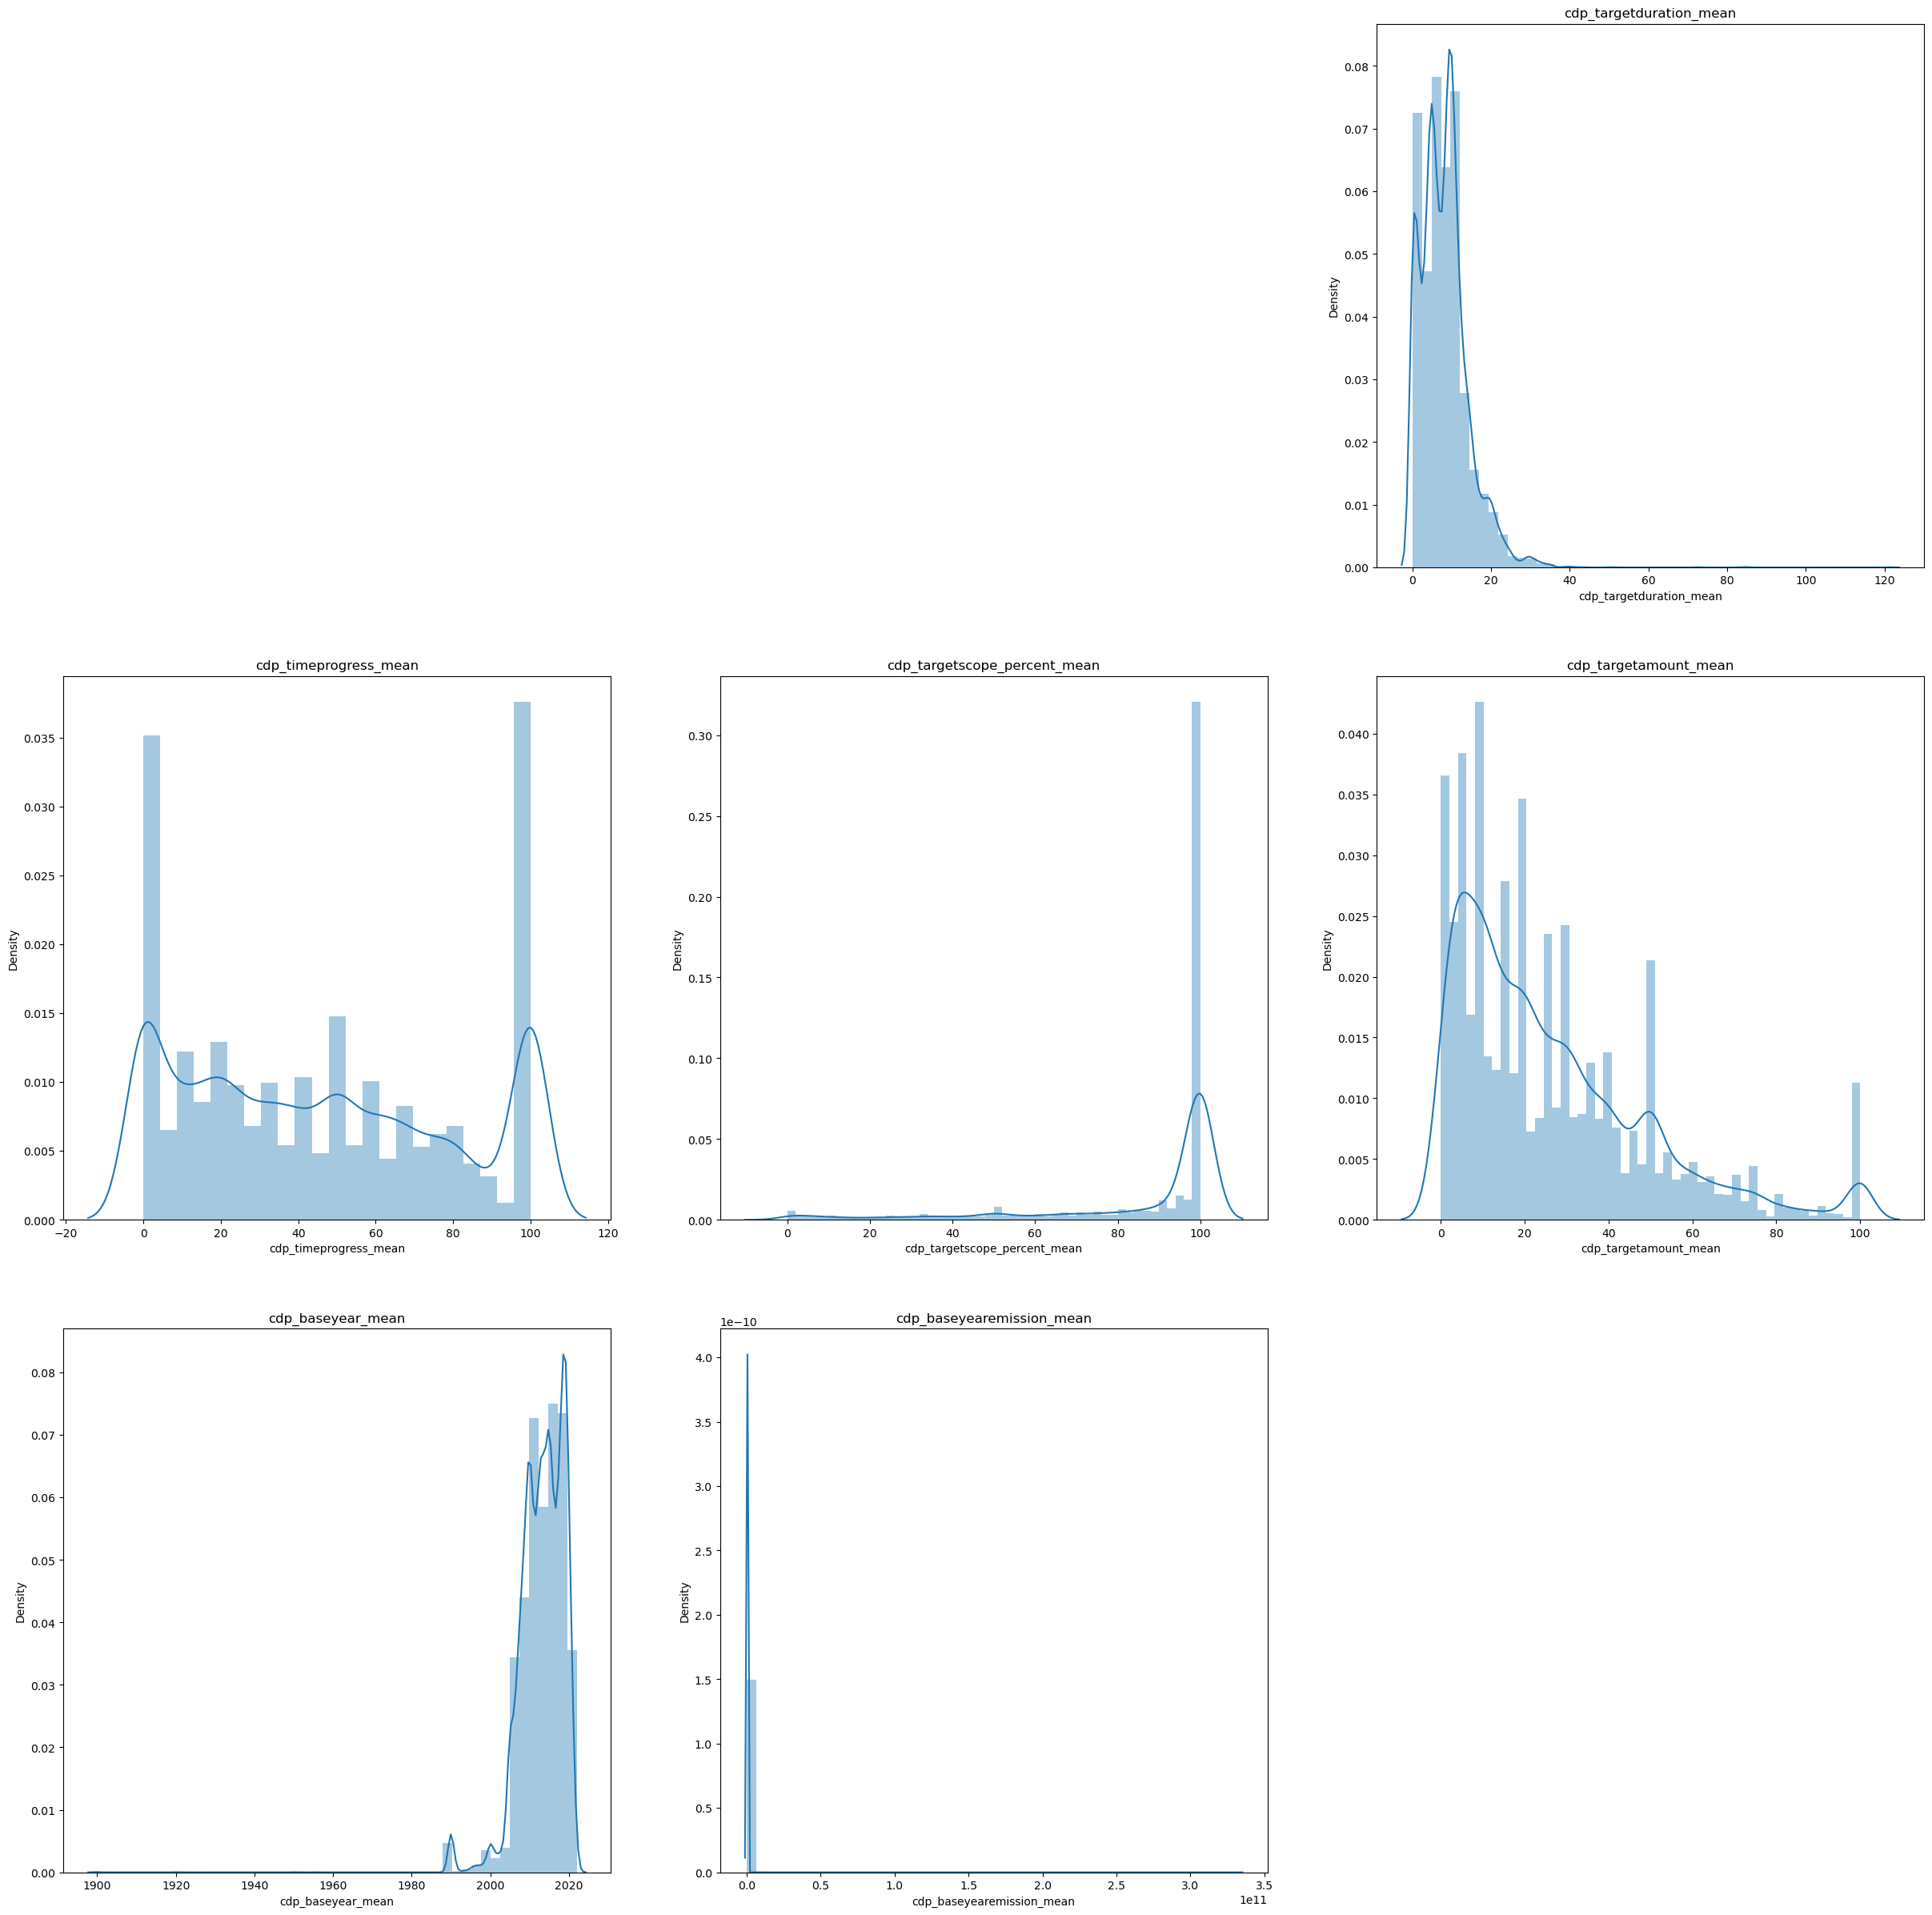

In [22]:
# do a distplot of all the columns but year and id in separate plots on a grid, use sns distplot, don't plot columns which have _na suffix
fig = plt.figure(figsize=(30, 30))
for i, col in enumerate(df_final.columns):
    if col not in ['id', 'year', 'cdp_targettype_absolute', 'cdp_targettype_intensity'] and not col.endswith('_na'):
        fig.add_subplot(3,3, i+1)
        sns.distplot(df_final[col].dropna())
        plt.title(col)
plt.show()

In [23]:
# taking the log1p of targetduration 
df_final.cdp_targetduration_mean = np.log1p(df_final.cdp_targetduration_mean)
df_final.cdp_targetamount_mean = np.log1p(df_final.cdp_targetamount_mean)
df_final.cdp_timeprogress_mean = np.log1p(df_final.cdp_timeprogress_mean)
df_final.cdp_baseyearemission_mean = np.log1p(df_final.cdp_baseyearemission_mean)

In [24]:
df_final.loc[df_final.cdp_baseyear_mean < 2000, 'cdp_baseyear_mean'] = 2000

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_71368/2221263755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[col].dropna())
/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_71368/2221263755.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[col].dr

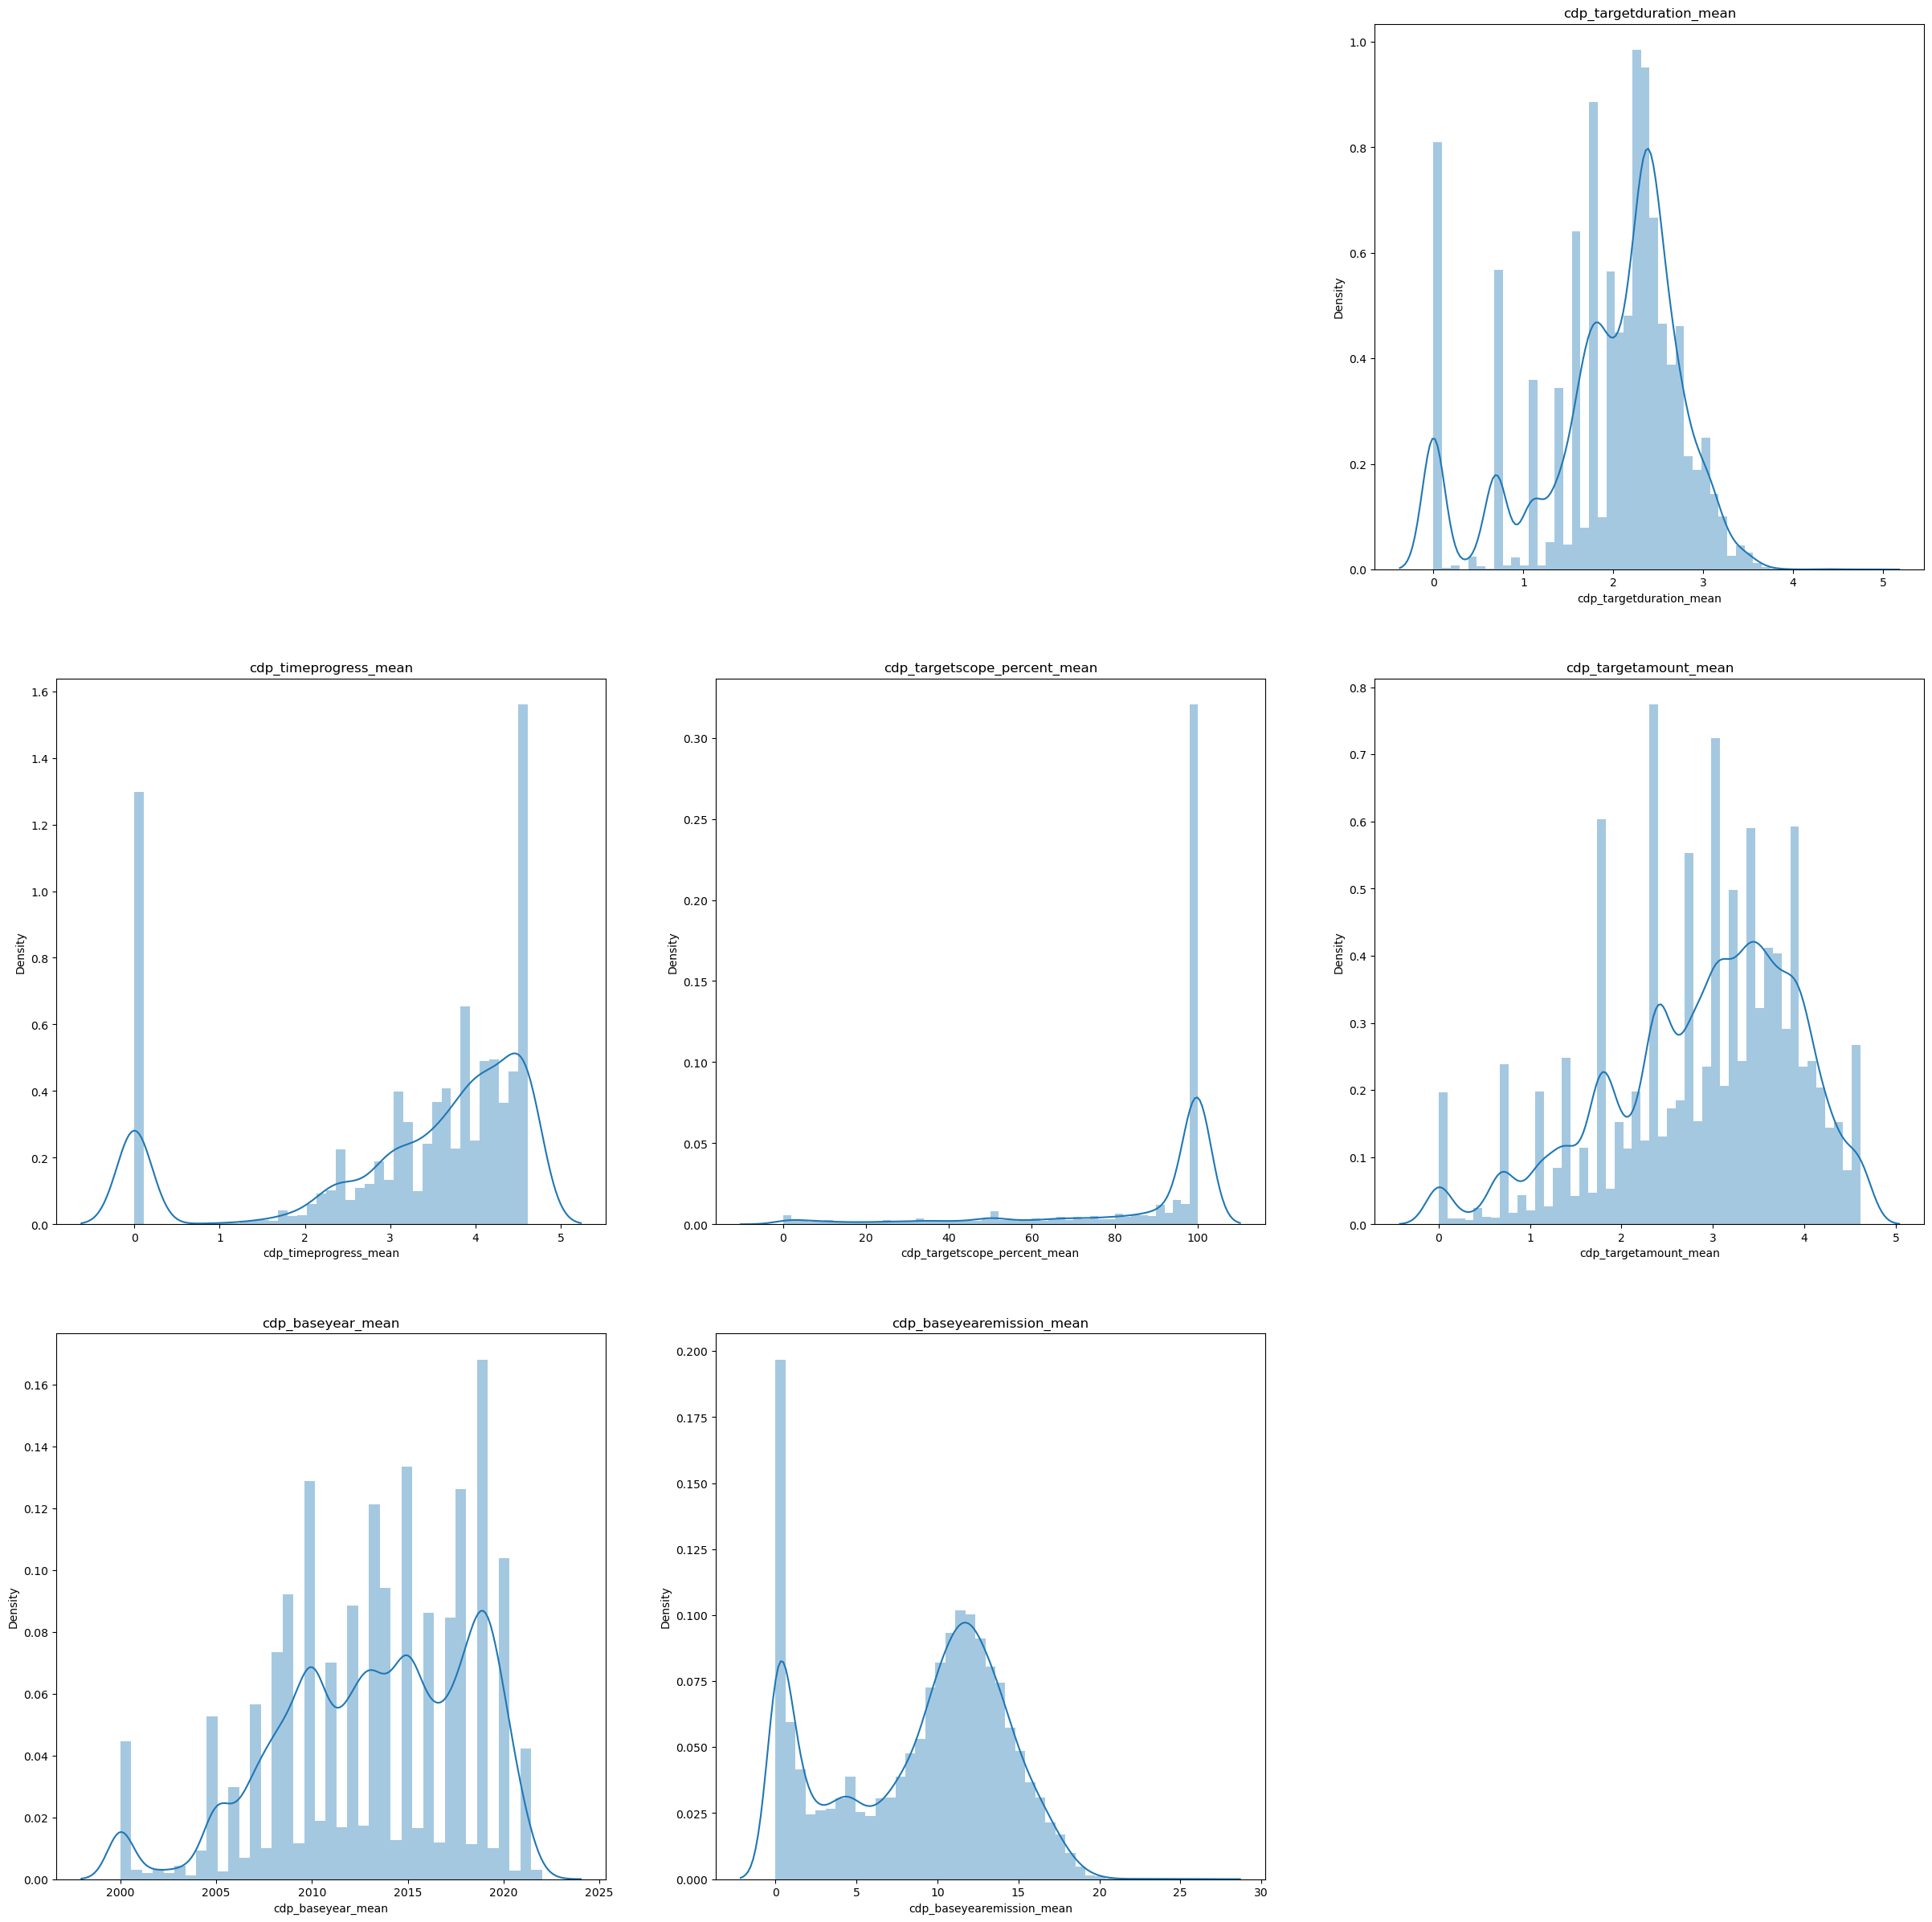

In [25]:
# do a distplot of all the columns but year and id in separate plots on a grid, use sns distplot, don't plot columns which have _na suffix
fig = plt.figure(figsize=(30, 30))
for i, col in enumerate(df_final.columns):
    if col not in ['id', 'year', 'cdp_targettype_absolute', 'cdp_targettype_intensity'] and not col.endswith('_na'):
        fig.add_subplot(3,3, i+1)
        sns.distplot(df_final[col].dropna())
        plt.title(col)
plt.show()

In [26]:
df_final.shape

(22596, 10)

In [27]:
df_final.isna().sum()

id                                  0
year                                0
cdp_targetduration_mean         10062
cdp_timeprogress_mean            2425
cdp_targetscope_percent_mean     1553
cdp_targetamount_mean            1340
cdp_baseyear_mean                1098
cdp_baseyearemission_mean        1523
cdp_targettype_absolute             0
cdp_targettype_intensity            0
dtype: int64

In [28]:
numerical_columns = ['cdp_targetduration_mean', 'cdp_timeprogress_mean', 'cdp_targetscope_percent_mean', 'cdp_targetamount_mean', 'cdp_baseyear_mean', 'cdp_baseyearemission_mean']

In [29]:
for column in numerical_columns:
    df_final[column + '_missing'] = df_final[column].isna().astype(int)
    df_final[column] = df_final[column].replace(np.nan, 0)

In [30]:
df_final.sample(5)

,id,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity,cdp_targetduration_mean_missing,cdp_timeprogress_mean_missing,cdp_targetscope_percent_mean_missing,cdp_targetamount_mean_missing,cdp_baseyear_mean_missing,cdp_baseyearemission_mean_missing
12179,3435,2011.0,0.0,3.931826,0.0,0.000000,0.0,0.000000,1,0,1,0,1,1,1,1
17123,6332,2015.0,0.0,4.454347,98.0,2.772589,2009.0,3.476614,0,1,1,0,0,0,0,0
7808,20676,2015.0,0.0,4.143135,95.0,3.258097,2009.0,4.934474,0,1,1,0,0,0,0,0
12044,3347,2015.0,0.0,4.615121,100.0,0.693147,2013.0,11.591937,1,1,1,0,0,0,0,0
3711,15169,2014.0,0.0,3.135494,100.0,3.044522,2011.0,8.348064,2,0,1,0,0,0,0,0


In [31]:
df_final.isna().sum()

id                                      0
year                                    0
cdp_targetduration_mean                 0
cdp_timeprogress_mean                   0
cdp_targetscope_percent_mean            0
cdp_targetamount_mean                   0
cdp_baseyear_mean                       0
cdp_baseyearemission_mean               0
cdp_targettype_absolute                 0
cdp_targettype_intensity                0
cdp_targetduration_mean_missing         0
cdp_timeprogress_mean_missing           0
cdp_targetscope_percent_mean_missing    0
cdp_targetamount_mean_missing           0
cdp_baseyear_mean_missing               0
cdp_baseyearemission_mean_missing       0
dtype: int64

In [32]:
df_final.shape

(22596, 16)

In [33]:
data.columns

Index(['id', 'cdp_target_reference', 'cdp_targetscope',
       'cdp_targetscope_percent', 'cdp_targetamount', 'cdp_baseyear',
       'cdp_baseyearemission', 'cdp_targetyear', 'cdp_sbt', 'cdp_timeprogress',
       'cdp_targetprogress', 'year', 'cdp_startyear', 'cdp_targetstatus',
       'cdp_targetduration', 'cdp_targettype'],
      dtype='object')

In [34]:
df_final.columns

Index(['id', 'year', 'cdp_targetduration_mean', 'cdp_timeprogress_mean',
       'cdp_targetscope_percent_mean', 'cdp_targetamount_mean',
       'cdp_baseyear_mean', 'cdp_baseyearemission_mean',
       'cdp_targettype_absolute', 'cdp_targettype_intensity',
       'cdp_targetduration_mean_missing', 'cdp_timeprogress_mean_missing',
       'cdp_targetscope_percent_mean_missing', 'cdp_targetamount_mean_missing',
       'cdp_baseyear_mean_missing', 'cdp_baseyearemission_mean_missing'],
      dtype='object')

In [35]:
df_final.describe()

,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity,cdp_targetduration_mean_missing,cdp_timeprogress_mean_missing,cdp_targetscope_percent_mean_missing,cdp_targetamount_mean_missing,cdp_baseyear_mean_missing,cdp_baseyearemission_mean_missing
count,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000,22596.00000,22596.000000,22596.000000,22596.000000,22596.000000,22596.000000
mean,2017.740356,1.079800,2.875231,80.877726,2.709157,1915.473466,8.249989,1.122234,0.864224,0.44530,0.107320,0.068729,0.059303,0.048593,0.067401
std,3.667713,1.146045,1.736197,32.562547,1.211637,432.927467,5.536572,1.254695,1.038268,0.49701,0.309526,0.252998,0.236195,0.215020,0.250721
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,1.895333,75.141875,1.954445,2009.000000,2.337528,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.693147,3.540269,100.000000,3.030134,2013.000000,9.746129,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,2.302585,4.257974,100.000000,3.616645,2017.500000,12.633270,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4.804021,4.615121,100.000000,4.615121,2022.000000,26.534407,17.000000,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_final

,id,year,cdp_targetduration_mean,cdp_timeprogress_mean,cdp_targetscope_percent_mean,cdp_targetamount_mean,cdp_baseyear_mean,cdp_baseyearemission_mean,cdp_targettype_absolute,cdp_targettype_intensity,cdp_targetduration_mean_missing,cdp_timeprogress_mean_missing,cdp_targetscope_percent_mean_missing,cdp_targetamount_mean_missing,cdp_baseyear_mean_missing,cdp_baseyearemission_mean_missing
0,10000,2014.0,0.000000,0.000000,95.0,0.000000,2013.0,1.813195,0,1,1,0,0,0,0,0
1,10000,2015.0,0.000000,4.615121,100.0,2.472750,2012.0,10.432628,1,1,1,0,0,0,0,0
2,10000,2016.0,0.000000,0.000000,100.0,3.044522,2012.0,10.727507,1,1,1,1,0,0,0,0
3,10013,2014.0,0.000000,4.615121,57.6,2.772589,2012.0,7.607381,0,1,1,0,0,0,0,0
4,10016,2021.0,0.000000,0.000000,100.0,2.397895,2019.0,11.650211,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22689,9995,2018.0,2.674149,1.519826,90.0,2.397895,2013.0,13.079178,1,1,0,0,0,0,0,0
22690,9995,2019.0,2.674149,2.483990,90.0,2.397895,2013.0,13.079178,1,1,0,0,0,0,0,0
22691,9995,2020.0,2.639057,2.796343,90.0,2.079442,2013.0,13.772324,1,0,0,0,0,0,0,0
22692,9995,2021.0,3.044523,0.000000,100.0,4.330733,2019.0,13.862529,2,0,0,0,0,0,0,0


In [37]:
df_final.shape

(22596, 16)

In [38]:
# saving the final dataframe in a processed csv
df_final.to_csv('../../data/processed/cdp_target_processed.csv', index=False)